# Анализ результатов A/B-тестирования: кумулятивные метрики #

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ab_data = pd.read_csv('data/ab_data.csv')

In [3]:
ab_data.head()

,user_id,timestamp,group,converted
0,851104,2017-01-21,A,0
1,804228,2017-01-12,A,0
2,661590,2017-01-11,B,0
3,853541,2017-01-08,B,0
4,864975,2017-01-21,A,1


In [4]:
ab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290482 entries, 0 to 290481
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_id    290482 non-null  int64 
 1   timestamp  290482 non-null  object
 2   group      290482 non-null  object
 3   converted  290482 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 8.9+ MB


In [5]:
ab_data['timestamp'] = pd.to_datetime(ab_data['timestamp'], format='%Y-%m-%d')
ab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290482 entries, 0 to 290481
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   user_id    290482 non-null  int64         
 1   timestamp  290482 non-null  datetime64[ns]
 2   group      290482 non-null  object        
 3   converted  290482 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 8.9+ MB


In [6]:
daily_data = ab_data.groupby(['timestamp', 'group']).agg({
    'user_id': 'count',
    'converted': 'sum'
}).reset_index().rename(columns={'user_id': 'users_count'})
daily_data.head()

,timestamp,group,users_count,converted
0,2017-01-02,A,2851,357
1,2017-01-02,B,2848,339
2,2017-01-03,A,6584,749
3,2017-01-03,B,6620,754
4,2017-01-04,A,6573,797


###  Задание 4.1 ###

Рассчитать конверсию на каждый день по приведённой формуле. Результат занести в столбец `conversion`.
Чему была равна конверсия (в процентах) в группе **А** 5 января 2017 года?
Ответ округлить до второго знака после запятой.

***Ответ - 12.32***

In [23]:
daily_data['conversion'] = daily_data['converted'] / daily_data['users_count'] * 100
display(daily_data.loc[daily_data['timestamp'] == '2017-01-05'].loc[daily_data['group'] == 'A']['conversion'])

6    12.322792
Name: conversion, dtype: float64

## ВИЗУАЛЬНЫЙ АНАЛИЗ КОНВЕРСИИ В ГРУППАХ ##

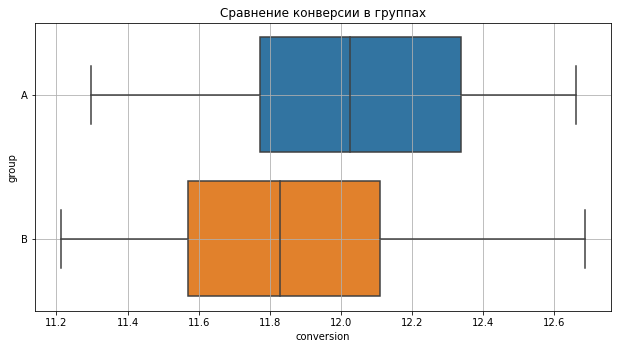

In [24]:
fig = plt.figure(figsize=(8, 4))
ax = fig.add_axes([1, 1, 1, 1])
sns.boxplot(
    data=daily_data,
    x='conversion',
    y='group',
    ax=ax
)
ax.set_title('Сравнение конверсии в группах')
ax.grid();

In [25]:
conversion_piv = daily_data.groupby('group')['conversion'].agg(['mean', 'median'])
display(conversion_piv)

,mean,median
group,,
A,12.032876,12.024261
B,11.872697,11.829582


## КУМУЛЯТИВНЫЕ МЕТРИКИ ##